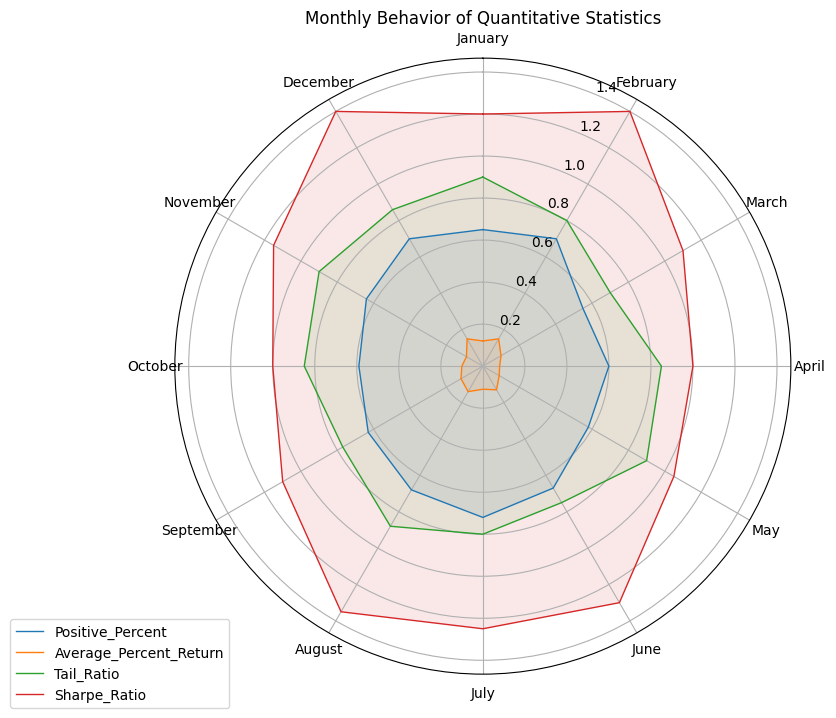

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

class MonthlyRadar:
    def __init__(self, data):
        self.df = pd.DataFrame(data)
        self.data_transposed = self.df.set_index('Month').T
        self.categories = list(self.df['Month'])
        self.N = len(self.categories)
        self.angles = [n / float(self.N) * 2 * pi for n in range(self.N)]
        self.angles += self.angles[:1]

    def plot(self):
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

        for i in range(len(self.data_transposed)):
            values = self.data_transposed.iloc[i].values.flatten().tolist()
            values += values[:1]
            
            ax.plot(self.angles, values, linewidth=1, linestyle='solid', label=self.data_transposed.index[i])
            ax.fill(self.angles, values, alpha=0.1)

        # Adjust the starting angle to make January at 12 o'clock position
        ax.set_theta_offset(pi/2)
        # Make it go clockwise
        ax.set_theta_direction(-1)

        plt.xticks(self.angles[:-1], self.categories)
        plt.title('Monthly Behavior of Quantitative Statistics')
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

        return fig, ax

# Sample data for 12 months
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Positive_Percent': [0.65, 0.70, 0.55, 0.60, 0.58, 0.67, 0.72, 0.68, 0.63, 0.59, 0.64, 0.70],
    'Average_Percent_Return': [0.12, 0.15, 0.10, 0.08, 0.09, 0.13, 0.11, 0.14, 0.12, 0.10, 0.09, 0.15],
    'Tail_Ratio': [0.9, 0.8, 0.7, 0.85, 0.9, 0.75, 0.8, 0.88, 0.77, 0.85, 0.9, 0.86],
    'Sharpe_Ratio': [1.2, 1.4, 1.1, 1.0, 1.05, 1.3, 1.25, 1.35, 1.1, 1.0, 1.15, 1.4]
}

# Create and plot the radar chart
radar = MonthlyRadar(data)
fig, ax = radar.plot()
plt.show()


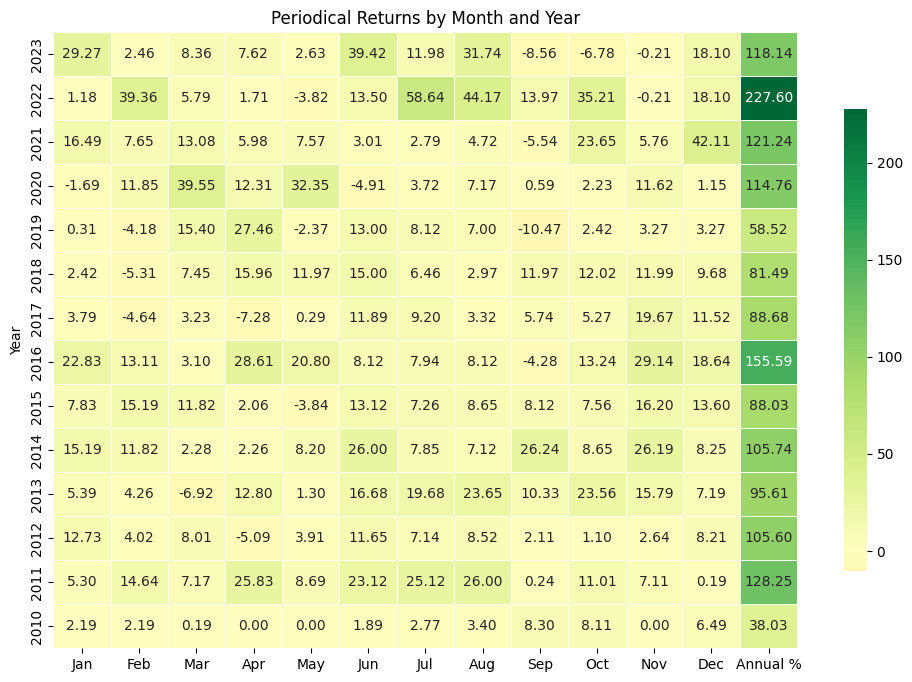

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
data = {
    "Year": [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010],
    "Jan": [29.27, 1.18, 16.49, -1.69, 0.31, 2.42, 3.79, 22.83, 7.83, 15.19, 5.39, 12.73, 5.30, 2.19],
    "Feb": [2.46, 39.36, 7.65, 11.85, -4.18, -5.31, -4.64, 13.11, 15.19, 11.82, 4.26, 4.02, 14.64, 2.19],
    "Mar": [8.36, 5.79, 13.08, 39.55, 15.40, 7.45, 3.23, 3.10, 11.82, 2.28, -6.92, 8.01, 7.17, 0.19],
    "Apr": [7.62, 1.71, 5.98, 12.31, 27.46, 15.96, -7.28, 28.61, 2.06, 2.26, 12.80, -5.09, 25.83, 0.00],
    "May": [2.63, -3.82, 7.57, 32.35, -2.37, 11.97, 0.29, 20.80, -3.84, 8.20, 1.30, 3.91, 8.69, 0.00],
    "Jun": [39.42, 13.50, 3.01, -4.91, 13.00, 15.00, 11.89, 8.12, 13.12, 26.00, 16.68, 11.65, 23.12, 1.89],
    "Jul": [11.98, 58.64, 2.79, 3.72, 8.12, 6.46, 9.20, 7.94, 7.26, 7.85, 19.68, 7.14, 25.12, 2.77],
    "Aug": [31.74, 44.17, 4.72, 7.17, 7.00, 2.97, 3.32, 8.12, 8.65, 7.12, 23.65, 8.52, 26.00, 3.40],
    "Sep": [-8.56, 13.97, -5.54, 0.59, -10.47, 11.97, 5.74, -4.28, 8.12, 26.24, 10.33, 2.11, 0.24, 8.30],
    "Oct": [-6.78, 35.21, 23.65, 2.23, 2.42, 12.02, 5.27, 13.24, 7.56, 8.65, 23.56, 1.10, 11.01, 8.11],
    "Nov": [-0.21, -0.21, 5.76, 11.62, 3.27, 11.99, 19.67, 29.14, 16.20, 26.19, 15.79, 2.64, 7.11, 0.00],
    "Dec": [18.10, 18.10, 42.11, 1.15, 3.27, 9.68, 11.52, 18.64, 13.60, 8.25, 7.19, 8.21, 0.19, 6.49],
    "Annual %": [118.14, 227.60, 121.24, 114.76, 58.52, 81.49, 88.68, 155.59, 88.03, 105.74, 95.61, 105.60, 128.25, 38.03]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the 'Year' column as the index
df.set_index('Year', inplace=True)

# Transpose the DataFrame to swap the rows and columns
df_t = df.T

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is already defined with your data
# Make sure 'Year' is set as the index and 'Annual %' is a column

# Set the 'Year' column as the index if it's not already
# df.set_index('Year', inplace=True) 

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt=".2f", cmap="RdYlGn", center=0, linewidths=.5, cbar_kws={"shrink": .75})

plt.title('Periodical Returns by Month and Year')
plt.show()


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Define a function to fetch and process data
def fetch_and_process_data(ticker='SPY', start='1990-01-01', end='2023-12-31'):
    # Fetch data
    data = yf.download(ticker, start=start, end=end, progress=False)['Adj Close']
    
    # Calculate monthly returns
    monthly_data = data.resample('M').ffill()
    monthly_returns = monthly_data.pct_change().dropna() * 100  # Convert to percentage
    
    # Organize returns into a pivot table
    monthly_returns['Year'] = monthly_returns.index.year
    monthly_returns['Month'] = monthly_returns.index.month
    monthly_returns['Month'] = monthly_returns['Month'].apply(lambda x: pd.Timestamp(2023, x, 1).strftime('%b'))  # Using strftime to get month abbreviation
    pivot = monthly_returns.pivot_table(index='Year', columns='Month', values='Adj Close', aggfunc='mean')
    pivot = pivot.fillna(0)  # Replace NaN with 0 for months without data
    
    return pivot

# Fetch and process data
pivot_table = fetch_and_process_data()

# Ensure columns are in the correct order
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot_table = pivot_table[months]

# Step 2: Calculate additional metrics
# Function to calculate Kelly ratio and fraction
def calculate_kelly_ratio(returns):
    win_prob = np.mean(returns > 0)
    loss_prob = 1 - win_prob
    win_return = np.mean(returns[returns > 0])
    loss_return = abs(np.mean(returns[returns < 0]))
    kelly_ratio = win_prob - (loss_prob / (win_return / loss_return))
    return kelly_ratio, kelly_ratio / 2  # Kelly fraction as half of Kelly ratio

# Calculate metrics
avg_returns = pivot_table.mean()
std_dev = pivot_table.std()
pos_perc = (pivot_table > 0).mean() * 100
skewness = pivot_table.apply(lambda x: skew(x.dropna()), axis=0)
kurt = pivot_table.apply(lambda x: kurtosis(x.dropna()), axis=0)

# Kelly ratio and fraction
kelly_ratios = pivot_table.apply(lambda x: calculate_kelly_ratio(x.dropna()), axis=0)
avg_kelly_ratio = kelly_ratios.apply(lambda x: x[0])
avg_kelly_fraction = kelly_ratios.apply(lambda x: x[1])

# Step 3: Visualize Data
# Heatmap of monthly returns
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="RdYlGn", center=0, linewidths=.5, cbar_kws={"shrink": .75})
plt.title('Monthly Returns Heatmap')
plt.show()

# Summary table
summary_table = pd.DataFrame({
    'Avg Returns (%)': avg_returns,
    'StDev (%)': std_dev,
    'Pos %': pos_perc,
    'Skewness': skewness,
    'Kurtosis': kurt,
    'Avg Kelly Ratio': avg_kelly_ratio,
    'Avg Kelly Fraction': avg_kelly_fraction
})

# Display summary table
print(summary_table)


AttributeError: 'Index' object has no attribute 'month'

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

class FundamentalData:
    def __init__(self, ticker, api_key):
        self.ticker = ticker
        self.api_key = api_key
        self.data = {}

    def get_stock_info(self):
        stock = yf.Ticker(self.ticker)
        self.data['info'] = stock.info
        return self.data['info']
    
    def get_historical_data(self, period='max', interval='1d'):
        stock = yf.Ticker(self.ticker)
        hist_data = stock.history(period=period, interval=interval)
        hist_data = hist_data.dropna()  # Remove rows with NaN values
        self.data['historical'] = hist_data
        return hist_data

    def get_financials(self):
        stock = yf.Ticker(self.ticker)
        self.data['financials'] = stock.financials.dropna(axis=1, how='all')
        return self.data['financials']
    
    def get_balance_sheet(self):
        stock = yf.Ticker(self.ticker)
        self.data['balance_sheet'] = stock.balance_sheet.dropna(axis=1, how='all')
        return self.data['balance_sheet']

    def get_cashflow(self):
        stock = yf.Ticker(self.ticker)
        self.data['cashflow'] = stock.cashflow.dropna(axis=1, how='all')
        return self.data['cashflow']
    
    def get_income_statement(self, period='quarter'):
        # Replace with API calls using the provided api_key
        # Example placeholder for fetching income statements using an external API
        # income_statement = fa.income_statement(self.ticker, self.api_key, period=period).T
        # self.data['income_statement'] = income_statement.dropna(axis=1, how='all')
        return self.data.get('income_statement', pd.DataFrame())

    def clean_data(self, dataframe):
        # Fill or drop NaN values, depending on strategy
        dataframe.fillna(0, inplace=True)  # Filling NaN values with 0
        return dataframe

    def merge_data(self):
        # Example merging of different financial data for analysis
        if 'historical' in self.data and 'income_statement' in self.data:
            merged_data = self.data['historical'].merge(self.data['income_statement'], left_index=True, right_index=True, how='outer')
            self.data['merged'] = self.clean_data(merged_data)
            return self.data['merged']
        return pd.DataFrame()
    
    def save_to_csv(self, dataframe, filename):
        """Saves the provided DataFrame to a CSV file."""
        try:
            dataframe.to_csv(filename, index=True)
            print(f"Data successfully saved to {filename}")
        except Exception as e:
            print(f"An error occurred while saving to CSV: {e}")

# Example usage
api_key = 'your_api_key_here'
fd = FundamentalData('MSFT', api_key)
print(fd.get_stock_info())
print(fd.get_historical_data())
print(fd.get_financials())
print(fd.get_balance_sheet())
print(fd.get_cashflow())


{'address1': 'One Microsoft Way', 'city': 'Redmond', 'state': 'WA', 'zip': '98052-6399', 'country': 'United States', 'phone': '425 882 8080', 'website': 'https://www.microsoft.com', 'industry': 'Software - Infrastructure', 'industryKey': 'software-infrastructure', 'industryDisp': 'Software - Infrastructure', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and pow

In [2]:
# Example usage
api_key = 'your_api_key_here'
fd = FundamentalData('MSFT', api_key)

# Fetch some data
hist_data = fd.get_historical_data()

# Save the historical data to a CSV file
fd.save_to_csv(hist_data, 'historical_data.csv')

Data successfully saved to historical_data.csv


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Summary Statistics: {'SPY': {'mean': 0.010752180492949468, 'std': 0.042771159901071255, 'skewness': -0.378079331100335, 'kurtosis': 0.5373133993539363}, 'QQQ': {'mean': 0.013934687512573408, 'std': 0.050633307781616635, 'skewness': -0.22940124590440264, 'kurtosis': 0.13273664125997486}, 'SPYI': {'mean': -0.003222524017597511, 'std': 0.0664289165273292, 'skewness': -0.143327609811592, 'kurtosis': -1.7810232427463473}, 'UPRO': {'mean': 0.028061050270136355, 'std': 0.13295757679688344, 'skewness': -0.428483280059104, 'kurtosis': 1.0046472347190294}, 'TQQQ': {'mean': 0.036381089265199215, 'std': 0.15846381143781077, 'skewness': -0.11149350400781585, 'kurtosis': 0.10717724815135954}}
Correlation Matrix:
            SPY       QQQ      SPYI      UPRO      TQQQ
SPY   1.000000  0.925844  0.996204  0.996742  0.926641
QQQ   0.925844  1.000000  0.977709  0.918518  0.994534
SPYI  0.996204  0.977709  1.000000  0.993725  0.978744
UPRO  0.996742  0.918518  0.993725  1.000000  0.926871
TQQQ  0.926641  

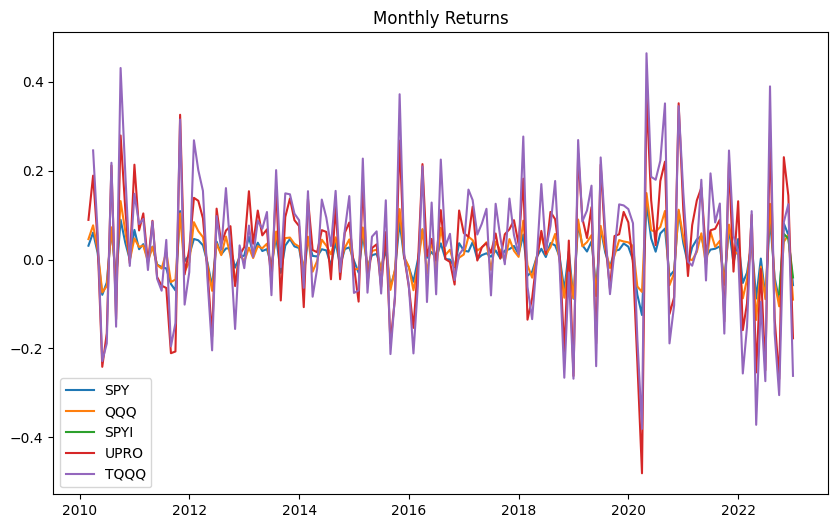

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


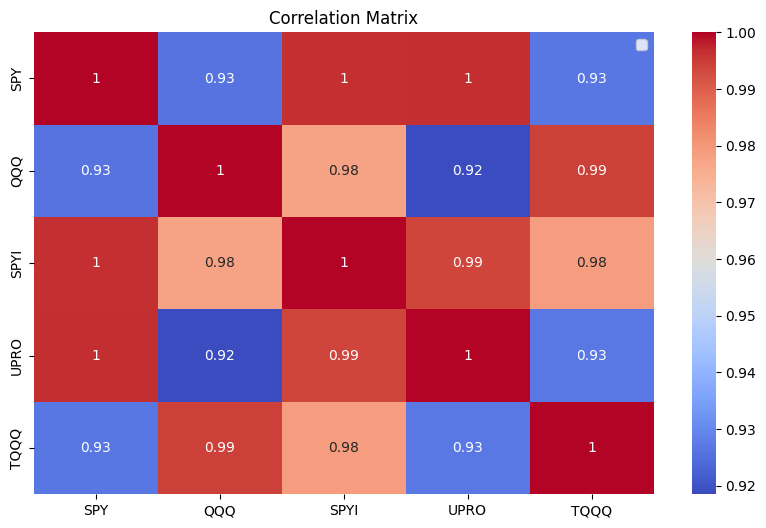

In [3]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set API keys for data retrieval (if needed)
# quandl.ApiConfig.api_key = "YOUR_QUANDL_API_KEY"
# av_key = "YOUR_ALPHA_VANTAGE_API_KEY"

# Utility function to fetch historical prices
def fetch_data(tickers, start_date="2010-01-01", end_date="2022-12-31"):
    """Fetch historical adjusted close prices for given tickers from Yahoo Finance."""
    try:
        return {ticker: yf.download(ticker, start=start_date, end=end_date)['Adj Close'] for ticker in tickers}
    except Exception as e:
        print(f"Error fetching data: {e}")
        return {}

# Utility function to calculate monthly returns
def calculate_monthly_returns(data):
    """Calculate monthly returns for each ticker."""
    return {ticker: prices.resample('M').ffill().pct_change().dropna() for ticker, prices in data.items()}

# Utility function to calculate summary statistics
def calculate_summary_statistics(returns):
    """Calculate mean, standard deviation, skewness, and kurtosis for each ticker."""
    return {ticker: {
        'mean': returns[ticker].mean(),
        'std': returns[ticker].std(),
        'skewness': skew(returns[ticker]),
        'kurtosis': kurtosis(returns[ticker])
    } for ticker in returns}

# Utility function to calculate correlation matrix
def calculate_correlation_matrix(returns):
    """Calculate the correlation matrix for the provided returns DataFrame."""
    combined_returns = pd.DataFrame(returns)
    return combined_returns.corr()

# Utility function to calculate Kelly Criterion
def calculate_kelly_criterion(returns):
    """Calculate Kelly Criterion allocations based on returns."""
    kelly_fractions = {}
    for ticker, ret in returns.items():
        mean_ret = ret.mean()
        std_ret = ret.std()
        kelly_fractions[ticker] = (mean_ret / std_ret ** 2) if std_ret != 0 else 0
    return kelly_fractions

# Utility function to visualize data
def visualize_data(data, title, plot_type="line"):
    """Visualize data using specified plot type."""
    plt.figure(figsize=(10, 6))
    if plot_type == "line":
        for label, series in data.items():
            plt.plot(series, label=label)
    elif plot_type == "heatmap":
        sns.heatmap(pd.DataFrame(data), annot=True, cmap='coolwarm')
    plt.title(title)
    plt.legend()
    plt.show()

# Main execution flow
if __name__ == "__main__":
    # Define the list of tickers
    tickers = ['SPY', 'QQQ', 'SPYI', 'UPRO', 'TQQQ']

    # Fetch historical data
    data = fetch_data(tickers)

    # Calculate monthly returns
    returns = calculate_monthly_returns(data)

    # Calculate summary statistics
    summary_stats = calculate_summary_statistics(returns)
    print("Summary Statistics:", summary_stats)

    # Calculate correlation matrix
    correlation_matrix = calculate_correlation_matrix(returns)
    print("Correlation Matrix:\n", correlation_matrix)

    # Calculate Kelly Criterion
    kelly_fractions = calculate_kelly_criterion(returns)
    print("Kelly Criterion Allocations:", kelly_fractions)

    # Visualize returns
    visualize_data(returns, "Monthly Returns", plot_type="line")

    # Visualize correlation matrix
    visualize_data(correlation_matrix, "Correlation Matrix", plot_type="heatmap")


In [ ]:

import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Function to load data for multiple assets
def load_data(asset_list, data_path, years):
    all_data = {}
    for asset in asset_list:
        data = []
        for year in years:
            files = glob.glob(f'{data_path}/{asset}_{year}*.csv')
            for file in files:
                df = pd.read_csv(file, parse_dates=['Datetime'], index_col='Datetime')
                data.append(df)
        all_data[asset] = pd.concat(data)
    return all_data

# Function to categorize market session
def categorize_session(time):
    if time < pd.Timestamp(year=2000, month=1, day=1, hour=9, minute=30).time():
        return 'Pre-market'
    elif time < pd.Timestamp(year=2000, month=1, day=1, hour=16, minute=0).time():
        return 'Regular market'
    else:
        return 'Post-market'

# Function to calculate intraday returns
def calculate_intraday_returns(data):
    data['Session'] = data.index.time.map(categorize_session)
    data['Intraday_Return'] = data.groupby('Session')['Close'].pct_change() * 100
    return data.dropna()

# Function to analyze nightshare strategy
def analyze_nightshare_strategy(data, asset):
    session_returns = data.groupby('Session')['Intraday_Return'].mean()
    print(f'Average returns by session for {asset}:')
    print(session_returns)
    session_returns.plot(kind='bar')
    plt.title(f'Nightshare Strategy Analysis for {asset}')
    plt.xlabel('Session')
    plt.ylabel('Average Return (%)')
    plt.show()

# Function to define percentage-based stop order thresholds
def define_stop_orders(thresholds):
    stop_loss = thresholds['stop_loss']
    take_profit = thresholds['take_profit']
    trailing_stop = thresholds['trailing_stop']
    return stop_loss, take_profit, trailing_stop

# Function to simulate stop orders
def simulate_stop_orders(data, stop_loss, take_profit, trailing_stop):
    # Simulate stop orders based on intraday data
    data['Stop_Loss'] = data['Close'] * (1 - stop_loss / 100)
    data['Take_Profit'] = data['Close'] * (1 + take_profit / 100)
    data['Trailing_Stop'] = data['Close'] * (1 - trailing_stop / 100)
    return data

# Function to backtest strategies
def backtest_strategies(data, stop_loss, take_profit, trailing_stop):
    # Backtest strategies using historical data
    data['Strategy_Return'] = data['Close'].pct_change() * 100
    data['Strategy_Return'] = data['Strategy_Return'].cumsum()
    return data

# Function to optimize parameters
def optimize_parameters(data, stop_loss_range, take_profit_range, trailing_stop_range):
    # Optimize parameters using grid search
    param_grid = {
        'stop_loss': stop_loss_range,
        'take_profit': take_profit_range,
        'trailing_stop': trailing_stop_range
    }
    grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(data['Close'].values.reshape(-1, 1), data['Strategy_Return'].values)
    return grid_search.best_params_

# Main function
def main():
    asset_list = ['AAPL', 'GOOG', 'AMZN']
    data_path = 'data'
    years = range(2010, 2022)
    data = load_data(asset_list, data_path, years)
    for asset in asset_list:
        data[asset] = calculate_intraday_returns(data[asset])
        analyze_nightshare_strategy(data[asset], asset)
        stop_loss, take_profit, trailing_stop = define_stop_orders({'stop_loss': 2, 'take_profit': 5, 'trailing_stop': 1})
        data[asset] = simulate_stop_orders(data[asset], stop_loss, take_profit, trailing_stop)
        data[asset] = backtest_strategies(data[asset], stop_loss, take_profit, trailing_stop)
        optimized_params = optimize_parameters(data[asset], [1, 2, 3], [4, 5, 6], [0.5, 1, 1.5])
        print(f'Optimized parameters for {asset}: {optimized_params}')

if __name__ == '__main__':
    main()


In [7]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import yfinance as yf
from scipy.stats import kurtosis, skew

class SPYDataAnalyzer:
    def __init__(self, years=10, cache_file='spy_data.csv'):
        self.years = years
        self.cache_file = cache_file
        self.data = None
    
    def fetch_data(self):
        # Check if data is cached and is up-to-date
        if os.path.exists(self.cache_file):
            modified_time = datetime.fromtimestamp(os.path.getmtime(self.cache_file))
            if datetime.now() - modified_time < timedelta(days=1):
                self.data = pd.read_csv(self.cache_file, parse_dates=['Date'], index_col='Date')
                return

        # Fetch data from Yahoo Finance
        end_date = datetime.now()
        start_date = end_date - timedelta(days=self.years * 365)
        spy = yf.download('SPY', start=start_date, end=end_date)
        self.data = spy[['Open', 'High', 'Low', 'Close']]
        self.data.to_csv(self.cache_file)
    
    def calculate_indicators(self):
        if self.data is None:
            raise ValueError("No data available. Please fetch data first.")
        
        # Calculate moving averages
        self.data['20_MA'] = self.data['Close'].rolling(window=20).mean()
        self.data['52_Week_MA'] = self.data['Close'].rolling(window=260).mean()
        
        # Calculate Bollinger Bands for 20-day and 52-week
        self.data['20_Upper_BB'] = self.data['20_MA'] + 2 * self.data['Close'].rolling(window=20).std()
        self.data['20_Lower_BB'] = self.data['20_MA'] - 2 * self.data['Close'].rolling(window=20).std()
        self.data['52_Upper_BB'] = self.data['52_Week_MA'] + 2 * self.data['Close'].rolling(window=260).std()
        self.data['52_Lower_BB'] = self.data['52_Week_MA'] - 2 * self.data['Close'].rolling(window=260).std()
        
        # Calculate daily returns and other statistics
        self.data['Daily_Return'] = self.data['Close'].pct_change()
        self.data['Cumulative_Return'] = (1 + self.data['Daily_Return']).cumprod() - 1
        self.data['Std_Dev'] = self.data['Daily_Return'].rolling(window=20).std()
        
        # Calculate statistical metrics only where there are enough data points
        self.data['Skewness'] = self.data['Daily_Return'].rolling(window=20).apply(lambda x: skew(x.dropna()), raw=False)
        self.data['Kurtosis'] = self.data['Daily_Return'].rolling(window=20).apply(lambda x: kurtosis(x.dropna()), raw=False)
        self.data['Positive_Return_Percentage'] = self.data['Daily_Return'].rolling(window=20).apply(lambda x: (x > 0).mean() * 100, raw=False)
        
        # Calculate Kelly ratio and fraction based on available returns
        win_rate = self.data['Positive_Return_Percentage'] / 100
        loss_rate = 1 - win_rate
        avg_win = self.data[self.data['Daily_Return'] > 0]['Daily_Return'].mean()
        avg_loss = abs(self.data[self.data['Daily_Return'] <= 0]['Daily_Return'].mean())
        self.data['Kelly_Ratio'] = win_rate - (loss_rate / (avg_win / avg_loss))
        self.data['Kelly_Fraction'] = self.data['Kelly_Ratio'] / 2
        
        # Drop initial rows with NaN values after calculations
        self.data.dropna(inplace=True)

    def get_data(self):
        return self.data
    
    def save_to_csv(self, filename='spy_analyzed_data.csv'):
        if self.data is not None:
            self.data.to_csv(filename)
        else:
            raise ValueError("No data available to save. Please fetch and process data first.")

# Example usage
analyzer = SPYDataAnalyzer(years=10)
analyzer.fetch_data()
analyzer.calculate_indicators()
data = analyzer.get_data()
print(data.head())
data.to_csv('spy_analyzed_output.csv')


                  Open        High         Low       Close       20_MA  \
Date                                                                     
2015-09-14  196.949997  197.009995  195.429993  196.009995  197.714001   
2015-09-15  196.610001  198.990005  195.960007  198.460007  197.107501   
2015-09-16  198.820007  200.410004  198.410004  200.179993  196.617501   
2015-09-17  200.020004  202.889999  199.279999  199.729996  196.188000   
2015-09-18  195.710007  198.679993  194.960007  195.449997  195.762000   

            52_Week_MA  20_Upper_BB  20_Lower_BB  52_Upper_BB  52_Lower_BB  \
Date                                                                         
2015-09-14  205.154193   210.258071   185.169930   217.385257   192.923128   
2015-09-15  205.146346   208.108348   186.106654   217.392008   192.900685   
2015-09-16  205.146231   205.950810   187.284192   217.392080   192.900382   
2015-09-17  205.140923   203.904356   188.471645   217.394991   192.886856   
2015-09-18  2

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Define a class for handling Kelly Criterion backtesting
class KellyBacktester:
    def __init__(self, initial_capital, ticker):
        """
        Initialize the backtester with initial capital and the stock ticker symbol.
        :param initial_capital: The starting amount of money for backtesting.
        :param ticker: The stock ticker symbol to fetch data for (e.g., 'SPY').
        """
        self.initial_capital = initial_capital
        self.capital = initial_capital
        self.ticker = ticker
        self.spy_data = None
        self.options_data = None

    def fetch_data(self):
        """
        Fetch historical stock data and options data for the given ticker.
        :return: True if data fetch is successful, False otherwise.
        """
        try:
            # Download historical stock data for the past 5 years with daily intervals
            self.spy_data = yf.download(self.ticker, period='5y', interval='1d')
            # Fetch the options data for the given ticker
            self.options_data = yf.Ticker(self.ticker).option_chain()
        except Exception as e:
            print(f"Error fetching data: {e}")
            return False
        return True

    def calculate_probability(self):
        """
        Calculate the probability of the stock price going up based on historical data.
        :return: Probability of a positive return.
        """
        # Calculate daily returns as the percentage change in adjusted closing prices
        returns = self.spy_data['Adj Close'].pct_change().dropna()
        # Calculate the probability of a positive return
        prob_win = (returns > 0).mean()
        return prob_win

    def get_options_data(self):
        """
        Fetch the latest options data for the given ticker.
        :return: Options data for the current date.
        """
        # Get today's date in the format 'YYYY-MM-DD'
        today = datetime.today().strftime('%Y-%m-%d')
        # Fetch the options data for the current date
        self.options_data = yf.Ticker(self.ticker).option_chain(date=today)
        return self.options_data

    def calculate_kelly_fraction(self, prob, odds):
        """
        Calculate the Kelly fraction for betting based on probability and odds.
        :param prob: Probability of winning.
        :param odds: Odds of the bet.
        :return: Kelly fraction.
        """
        # Ensure the Kelly fraction is between 0 and 1, and avoid division by zero
        if odds == 0:
            return 0
        kelly = (odds * prob - (1 - prob)) / odds
        return max(0, min(kelly, 1))

    def bull_put_spread(self, current_price):
        """
        Calculate the bull put spread with a $1-2 width from the current price.
        :param current_price: The current stock price.
        :return: Bull put spread details.
        """
        puts = self.options_data.puts
        # Find puts with strikes below current price
        otm_puts = puts[puts['strike'] < current_price]
        if len(otm_puts) < 2:
            return None  # Not enough strikes available
        
        lower_strike_put = otm_puts.iloc[-1]  # Closest to money
        higher_strike_put = otm_puts.iloc[-2]  # Second closest to money

        lower_strike_price = lower_strike_put['strike']
        higher_strike_price = higher_strike_put['strike']
        lower_strike_premium = lower_strike_put['lastPrice']
        higher_strike_premium = higher_strike_put['lastPrice']

        spread_credit = higher_strike_premium - lower_strike_premium
        max_loss = higher_strike_price - lower_strike_price - spread_credit

        return {
            'lower_strike_price': lower_strike_price,
            'higher_strike_price': higher_strike_price,
            'spread_credit': spread_credit,
            'max_loss': max_loss
        }

    def bear_call_spread(self, current_price):
        """
        Calculate the bear call spread with a $1-2 width from the current price.
        :param current_price: The current stock price.
        :return: Bear call spread details.
        """
        calls = self.options_data.calls
        # Find calls with strikes above current price
        otm_calls = calls[calls['strike'] > current_price]
        if len(otm_calls) < 2:
            return None  # Not enough strikes available
        
        lower_strike_call = otm_calls.iloc[0]  # Closest to money
        higher_strike_call = otm_calls.iloc[1]  # Second closest to money

        lower_strike_price = lower_strike_call['strike']
        higher_strike_price = higher_strike_call['strike']
        lower_strike_premium = lower_strike_call['lastPrice']
        higher_strike_premium = higher_strike_call['lastPrice']

        spread_credit = lower_strike_premium - higher_strike_premium
        max_loss = higher_strike_price - lower_strike_price - spread_credit

        return {
            'lower_strike_price': lower_strike_price,
            'higher_strike_price': higher_strike_price,
            'spread_credit': spread_credit,
            'max_loss': max_loss
        }

    def backtest(self):
        """
        Perform backtesting using the Kelly Criterion on historical stock and options data.
        """
        print(f"Starting backtest with initial capital: ${self.initial_capital}")
        self.fetch_data()
        if self.spy_data is None or self.options_data is None:
            print("Data fetch failed, backtesting cannot proceed.")
            return
        
        # Calculate the probability of winning based on historical data
        prob_win = self.calculate_probability()
        print(f"Calculated win probability based on historical data: {prob_win:.2f}")

        # Define the backtesting period as the past year
        end_date = datetime.today()
        start_date = end_date - timedelta(days=365)
        spy_backtest_data = self.spy_data.loc[start_date:end_date]

        for date, row in spy_backtest_data.iterrows():
            # Fetch the latest options data for each date in the backtesting period
            self.get_options_data()
            current_price = row['Adj Close']

            # Calculate bull put spread and bear call spread
            bull_put = self.bull_put_spread(current_price)
            bear_call = self.bear_call_spread(current_price)

            if bull_put is None or bear_call is None:
                print(f"Date: {date}, Skipping due to insufficient options data")
                continue

            # Calculate Kelly fractions for both spreads
            bull_put_kelly = self.calculate_kelly_fraction(prob_win, bull_put['spread_credit'] / bull_put['max_loss'] if bull_put['max_loss'] != 0 else 0)
            bear_call_kelly = self.calculate_kelly_fraction(1 - prob_win, bear_call['spread_credit'] / bear_call['max_loss'] if bear_call['max_loss'] != 0 else 0)

            # Calculate the amount to bet on each spread based on the Kelly fraction
            bet_bull_put = self.capital * bull_put_kelly
            bet_bear_call = self.capital * bear_call_kelly

            # Simulate the outcome based on the actual next day's price movement
            next_day_price = spy_backtest_data.loc[date:].iloc[1]['Adj Close'] if date != spy_backtest_data.index[-1] else current_price
            
            # Update capital based on the outcome
            if next_day_price > current_price:
                self.capital += bet_bull_put * (bull_put['spread_credit'] / bull_put['max_loss'] if bull_put['max_loss'] != 0 else 0)
                self.capital -= min(bet_bear_call, bear_call['max_loss'])
            else:
                self.capital -= min(bet_bull_put, bull_put['max_loss'])
                self.capital += bet_bear_call * (bear_call['spread_credit'] / bear_call['max_loss'] if bear_call['max_loss'] != 0 else 0)

            print(f"Date: {date}, Capital: ${self.capital:.2f}")

        print(f"Ending capital after backtesting: ${self.capital:.2f}")

# Run the backtester
backtester = KellyBacktester(initial_capital=100000, ticker='SPY')
backtester.backtest()


Starting backtest with initial capital: $100000


[*********************100%***********************]  1 of 1 completed


Calculated win probability based on historical data: 0.55
Date: 2023-09-05 00:00:00, Capital: $-230329.73
Date: 2023-09-06 00:00:00, Capital: $530534.37
Date: 2023-09-07 00:00:00, Capital: $530537.30
Date: 2023-09-08 00:00:00, Capital: $530540.23
Date: 2023-09-11 00:00:00, Capital: $-1222013.41
Date: 2023-09-12 00:00:00, Capital: $-562357.37
Date: 2023-09-13 00:00:00, Capital: $-258790.79
Date: 2023-09-14 00:00:00, Capital: $596090.07
Date: 2023-09-15 00:00:00, Capital: $596093.00
Date: 2023-09-18 00:00:00, Capital: $-1372999.22
Date: 2023-09-19 00:00:00, Capital: $3162504.06
Date: 2023-09-20 00:00:00, Capital: $13681499.57
Date: 2023-09-21 00:00:00, Capital: $59188343.90
Date: 2023-09-22 00:00:00, Capital: $59188341.82
Date: 2023-09-25 00:00:00, Capital: $256058167.16
Date: 2023-09-26 00:00:00, Capital: $255802362.71
Date: 2023-09-27 00:00:00, Capital: $255546813.82
Date: 2023-09-28 00:00:00, Capital: $1105536091.56
Date: 2023-09-29 00:00:00, Capital: $4782724632.58
Date: 2023-10-02 0

In [16]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from scipy.stats import norm
from dateutil.relativedelta import relativedelta

# Define a class for handling Kelly Criterion backtesting
class KellyBacktester:
    def __init__(self, initial_capital, ticker):
        self.initial_capital = initial_capital
        self.capital = initial_capital
        self.ticker = ticker
        self.spy_data = None
        self.options_data = None
        self.treasury_data = None

    def fetch_data(self):
        try:
            # Download historical data for the specified ticker (5 years for probability calculation)
            self.spy_data = yf.download(self.ticker, period='5y', interval='1d')
            # Fetch the current option chain for the ticker
            self.options_data = yf.Ticker(self.ticker).option_chain()
            # Fetch 13-week Treasury Bill rate data
            self.treasury_data = yf.download('^IRX', period='5y', interval='1d')
        except Exception as e:
            print(f"Error fetching data: {e}")
            return False
        return True

    def calculate_probability(self, end_date):
        # Calculate the probability of a positive return based on 52 weeks of historical data
        start_date = end_date - timedelta(weeks=52)
        returns = self.spy_data.loc[start_date:end_date]['Adj Close'].pct_change().dropna()
        prob_win = (returns > 0).mean()
        return prob_win

    def get_risk_free_rate(self, date):
        # Get the most recent 13-week Treasury Bill rate before the given date
        treasury_rate = self.treasury_data.loc[:date].iloc[-1]['Adj Close'] / 100
        return treasury_rate

    def get_options_data(self):
        # Fetch the latest options data for the current date
        today = datetime.today().strftime('%Y-%m-%d')
        self.options_data = yf.Ticker(self.ticker).option_chain(date=today)
        return self.options_data

    def calculate_kelly_fraction(self, prob, odds):
        # Calculate the Kelly fraction, allowing for negative values
        if odds == 0:
            return 0
        kelly = (odds * prob - (1 - prob)) / odds
        return kelly  # Allow negative Kelly fractions

    def black_scholes_cdf(self, strike, current_price, volatility, time_to_expiration, risk_free_rate):
        # Calculate the cumulative distribution function for the Black-Scholes model
        d1 = (np.log(current_price / strike) + (risk_free_rate + 0.5 * volatility ** 2) * time_to_expiration) / (volatility * np.sqrt(time_to_expiration))
        return norm.cdf(d1)

    def find_spread(self, options, current_price, is_bullish):
        # Find appropriate option strikes for a spread strategy
        if is_bullish:
            otm_options = options[options['strike'] < current_price].sort_values('strike', ascending=False)
        else:
            otm_options = options[options['strike'] > current_price].sort_values('strike')

        for i in range(len(otm_options) - 1):
            lower_strike = otm_options.iloc[i]
            higher_strike = otm_options.iloc[i + 1]
            if abs(higher_strike['strike'] - lower_strike['strike']) <= 1:
                return lower_strike, higher_strike

        return None, None

    def calculate_spread(self, current_price, volatility, time_to_expiration, risk_free_rate, is_bullish):
        # Calculate the details of the option spread
        options = self.options_data.puts if is_bullish else self.options_data.calls
        lower_strike, higher_strike = self.find_spread(options, current_price, is_bullish)

        if lower_strike is None or higher_strike is None:
            return None

        lower_strike_price = lower_strike['strike']
        higher_strike_price = higher_strike['strike']
        lower_strike_premium = lower_strike['lastPrice']
        higher_strike_premium = higher_strike['lastPrice']

        spread_credit = abs(higher_strike_premium - lower_strike_premium)
        max_loss = abs(higher_strike_price - lower_strike_price) - spread_credit

        prob_lower_strike = self.black_scholes_cdf(lower_strike_price, current_price, volatility, time_to_expiration, risk_free_rate)
        prob_higher_strike = self.black_scholes_cdf(higher_strike_price, current_price, volatility, time_to_expiration, risk_free_rate)

        return {
            'lower_strike_price': lower_strike_price,
            'higher_strike_price': higher_strike_price,
            'spread_credit': spread_credit,
            'max_loss': max_loss,
            'prob_lower_strike': prob_lower_strike,
            'prob_higher_strike': prob_higher_strike
        }

    def backtest(self):
        print(f"Starting backtest with initial capital: ${self.initial_capital}")
        self.fetch_data()
        if self.spy_data is None or self.options_data is None or self.treasury_data is None:
            print("Data fetch failed, backtesting cannot proceed.")
            return
        
        # Set up backtesting period
        end_date = datetime.today()
        start_date = end_date - timedelta(days=365)
        spy_backtest_data = self.spy_data.loc[start_date:end_date]

        # Calculate annualized volatility
        volatility = self.spy_data['Adj Close'].pct_change().std() * np.sqrt(252)
        
        time_to_expiration = 1/52  # Assuming weekly options

        current_month = None
        for date, row in spy_backtest_data.iterrows():
            # Recalculate risk-free rate and probability at the start of each month
            if current_month != date.month:
                current_month = date.month
                risk_free_rate = self.get_risk_free_rate(date)
                prob_win = self.calculate_probability(date)
                print(f"Updated for {date.strftime('%Y-%m')}: Risk-free rate: {risk_free_rate:.2%}, Win probability: {prob_win:.2f}")

            self.get_options_data()
            current_price = row['Adj Close']

            # Calculate both bull put and bear call spreads
            bull_put = self.calculate_spread(current_price, volatility, time_to_expiration, risk_free_rate, True)
            bear_call = self.calculate_spread(current_price, volatility, time_to_expiration, risk_free_rate, False)

            if bull_put is None or bear_call is None:
                print(f"Date: {date}, Skipping due to insufficient options data")
                continue

            # Calculate Kelly fractions for both spreads
            bull_put_kelly = self.calculate_kelly_fraction(prob_win, bull_put['spread_credit'] / bull_put['max_loss'] if bull_put['max_loss'] != 0 else 0)
            bear_call_kelly = self.calculate_kelly_fraction(1 - prob_win, bear_call['spread_credit'] / bear_call['max_loss'] if bear_call['max_loss'] != 0 else 0)

            # Calculate number of spreads to trade based on Kelly fraction
            bull_put_spreads = int(abs(bull_put_kelly) * self.capital / (100 * bull_put['max_loss']))
            bear_call_spreads = int(abs(bear_call_kelly) * self.capital / (100 * bear_call['max_loss']))

            bull_put_bet = bull_put_spreads * 100 * bull_put['max_loss']
            bear_call_bet = bear_call_spreads * 100 * bear_call['max_loss']

            # Determine next day's price for outcome calculation
            next_day_price = spy_backtest_data.loc[date:].iloc[1]['Adj Close'] if date != spy_backtest_data.index[-1] else current_price
            
            # Update capital based on trade outcomes
            if next_day_price > current_price:
                self.capital += bull_put_bet * (bull_put['spread_credit'] / bull_put['max_loss'] if bull_put['max_loss'] != 0 else 0)
                self.capital -= bear_call_bet
            else:
                self.capital -= bull_put_bet
                self.capital += bear_call_bet * (bear_call['spread_credit'] / bear_call['max_loss'] if bear_call['max_loss'] != 0 else 0)

            print(f"Date: {date}, Bull Put Spreads: {bull_put_spreads}, Bear Call Spreads: {bear_call_spreads}, Capital: ${self.capital:.2f}")

        print(f"Ending capital after backtesting: ${self.capital:.2f}")

# Run the backtester
backtester = KellyBacktester(initial_capital=100000, ticker='SPY')
backtester.backtest()

Starting backtest with initial capital: $100000


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Updated for 2023-09: Risk-free rate: 5.28%, Win probability: 0.50
Date: 2023-09-05 00:00:00, Skipping due to insufficient options data
Date: 2023-09-06 00:00:00, Skipping due to insufficient options data
Date: 2023-09-07 00:00:00, Skipping due to insufficient options data
Date: 2023-09-08 00:00:00, Skipping due to insufficient options data
Date: 2023-09-11 00:00:00, Skipping due to insufficient options data
Date: 2023-09-12 00:00:00, Skipping due to insufficient options data
Date: 2023-09-13 00:00:00, Skipping due to insufficient options data
Date: 2023-09-14 00:00:00, Skipping due to insufficient options data
Date: 2023-09-15 00:00:00, Skipping due to insufficient options data
Date: 2023-09-18 00:00:00, Skipping due to insufficient options data
Date: 2023-09-19 00:00:00, Skipping due to insufficient options data
Date: 2023-09-20 00:00:00, Skipping due to insufficient options data
Date: 2023-09-21 00:00:00, Skipping due to insufficient options data
Date: 2023-09-22 00:00:00, Skipping d